### custom breakdown file for a model as a netcdf

    -air sea C flux
    -air sea SO flux
    -air sea export
    -air sea annual surface DIC
    -air sea annual S (surface)
    -the above two at 100m and for SO
    -run in a notebook format

Takes model names and plots

In [1]:
import matplotlib.pyplot as plt
import glob
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/WORK_SCRIPTS')
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
import scendict as sc
import breakdown as bp
import plotr as pr
from importlib import reload
reload(bp)

<module 'breakdown' from '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/WORK_SCRIPTS/breakdown.py'>

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:

#------CHANGE THIS TO WHAT YOU WANT TO EXTRACT
extract = False #extracting?
graph = True #plotting?

In [4]:

sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/' #results directory
fnam = 'Cflx_comparison_1-3.png' ## filename for resulting plot
tms_te = ['TOM12_DW_WE43']

tms = ['TOM12_TJ_1ASA','TOM12_TJ_1BSA', 'TOM12_TJ_3ASA', 'TOM12_TJ_3BSA',\
          'TOM12_TJ_2ASA', 'TOM12_TJ_2BSA']


#tms = ['TOM12_TJ_1ASA','TOM12_TJ_1BSA']#, 'TOM12_TJ_3ASA', 'TOM12_TJ_3BSA',\
      #  'TOM12_DW_WE43','TOM12_TJ_WE43', 'TOM12_DW_GA01'] ##models to plot
 ##models to extract

descs = ['1ASA: TJ(MET), Hist. ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '1BSA: TJ(MET), Hist. ozone, SSP 3-7.0, restart@ WE43(1948)',\
         '3ASA: TJ(MET), 1990 ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '3BSA: TJ(MET), 1990 ozone, SSP 3-7.0, restart@ WE43(1948)',\
         '2ASA: TJ(MET), 1990 ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '2BSA: TJ(MET), 1990 ozone, SSP 3-7.0, restart@ WE43(1948)',\
         'DW_WE43: DW(ERA5), DW_WE43 with GOC limit OFF',\
         'TJ_WE43: TJ(ERA5), rerun of DW_WE43 with GOC limit ON',\
         'DW_GA01: DW(NCEP), GCB run, no GOC brakes'] 


cols = [sc.scen['1A']['color'],\
        sc.scen['1B']['color'],\
        sc.scen['3A']['color'],\
        sc.scen['3B']['color'],\
        sc.scen['2A']['color'],\
        sc.scen['2B']['color'],\
        'grey', 'k', 'b'] #colours for models in tm

linestyles = ['-','-','-','-','-','-','-',':','-']

In [5]:
reload(bp)
if extract: 
    for tm in tms_te:
        bp.breakdown_maker(tm, bdflag = 'cflx', resDir = sdir, fmi = 1948)



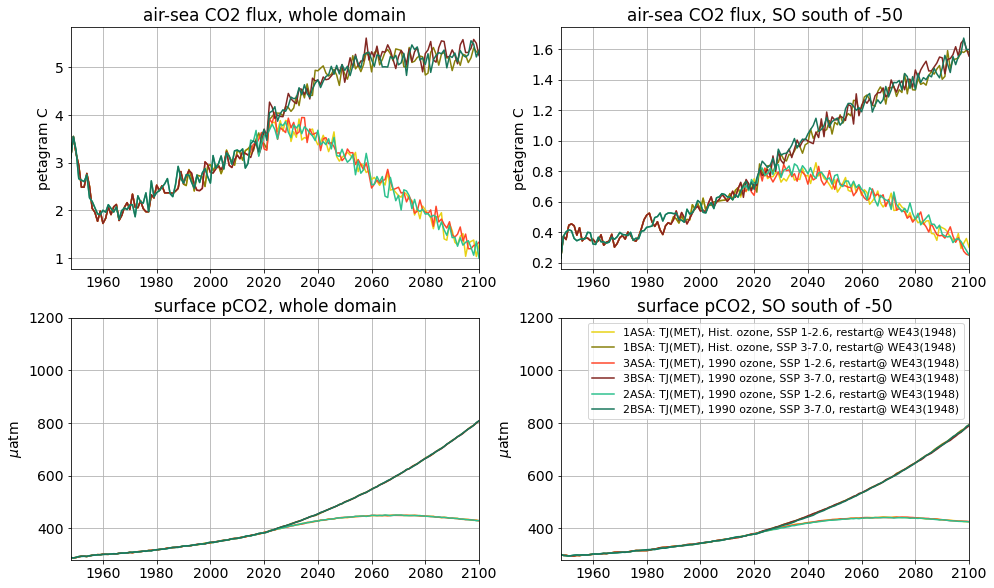

In [6]:
### open the datasets
reload(pr)
if graph:
    dsets = []

    for tm in tms:
        #print(tm)
        w = glob.glob(f'{sdir}*SUMMARY*{tm}*')
        #print(w)
        ds = xr.open_dataset(w[0])
        dsets.append(ds)
    pr.plot_carbon(dsets, cols, descs, linestyles, sdir, fnam, tstart = 1948, tend = 2100, tendatm =1200)


In [7]:


def plot_carbon_1(dsets, cols, descs, ls, sdir, fnam, tstart = 1948, tend = 2100, tendatm = 800):
    fact = 0.7
    fig, axs = plt.subplots(2,1, figsize=(14*fact, 14*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    ### cflx total
    for i in range(0,len(dsets)):
        ds = dsets[i]; col = cols[i]
        #axs[1].plot(ds.yrs, ds.cflx, color = col, label = descs[i], linestyle = ls[i])
        axs[0].plot(ds.yrs, ds.cflx_so, color = col, linestyle = ls[i], label = descs[i])
        # axs[2].plot(ds.yrs, ds.pco2, color = col, linestyle = ls[i])
        # axs[3].plot(ds.yrs, ds.pco2_so, color = col, label = descs[i], linestyle = ls[i])

    tits = ['CO$_2$ sink \n Southern Ocean south of 50$^{\circ}$S', 'CO$_2$ sink \n global ocean', \
            'surface pCO2, whole domain', 'surface pCO2, SO south of -50']
    ylabs = ['petagram C', 'petagram C', '$\mu$atm', '$\mu$atm']
    for i in range(0,2):
        axs[i].grid()

        axs[i].set_xlim(1960,tend)
        axs[i].set_title(tits[i])
        axs[i].set_ylabel(ylabs[i])

    axs[0].set_ylim(0.2,1.8)
    axs[1].set_ylim(1,6)
    axs[0].legend(bbox_to_anchor = [1,1], fontsize = 11)
    plt.tight_layout()
    fig.savefig(f'{sdir}{fnam}')
 


def plot_carbon_2(dsets, cols, descs, ls, sdir, fnam, tstart = 1948, tend = 2100, tendatm = 800):
    fact = 0.7
    fig, axs = plt.subplots(2,1, figsize=(14*fact, 14*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    ### cflx total
    for i in range(0,len(dsets)):
        ds = dsets[i]; col = cols[i]
        axs[1].plot(ds.yrs, ds.cflx, color = col, label = descs[i], linestyle = ls[i])
        axs[0].plot(ds.yrs, ds.cflx_so, color = col, linestyle = ls[i], label = descs[i])
        # axs[2].plot(ds.yrs, ds.pco2, color = col, linestyle = ls[i])
        # axs[3].plot(ds.yrs, ds.pco2_so, color = col, label = descs[i], linestyle = ls[i])

    tits = ['CO$_2$ sink \n Southern Ocean south of 50$^{\circ}$S', 'CO$_2$ sink \n global ocean', \
            'surface pCO2, whole domain', 'surface pCO2, SO south of -50']
    ylabs = ['petagram C', 'petagram C', '$\mu$atm', '$\mu$atm']
    for i in range(0,2):
        axs[i].grid()

        axs[i].set_xlim(1960,tend)
        axs[i].set_title(tits[i])
        axs[i].set_ylabel(ylabs[i])

    axs[0].set_ylim(0.2,1.8)
    axs[1].set_ylim(1,6)
    axs[0].legend(bbox_to_anchor = [1,1], fontsize = 11)
    plt.tight_layout()
    fig.savefig(f'{sdir}{fnam}')
    

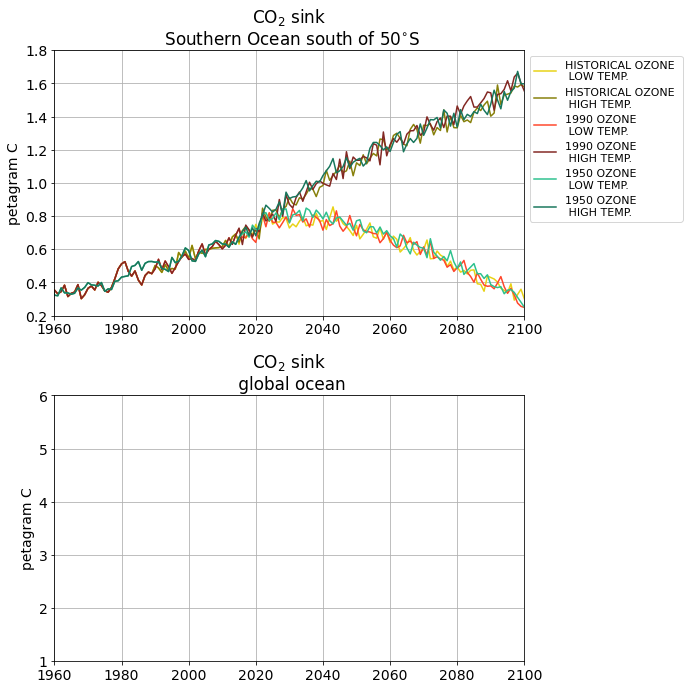

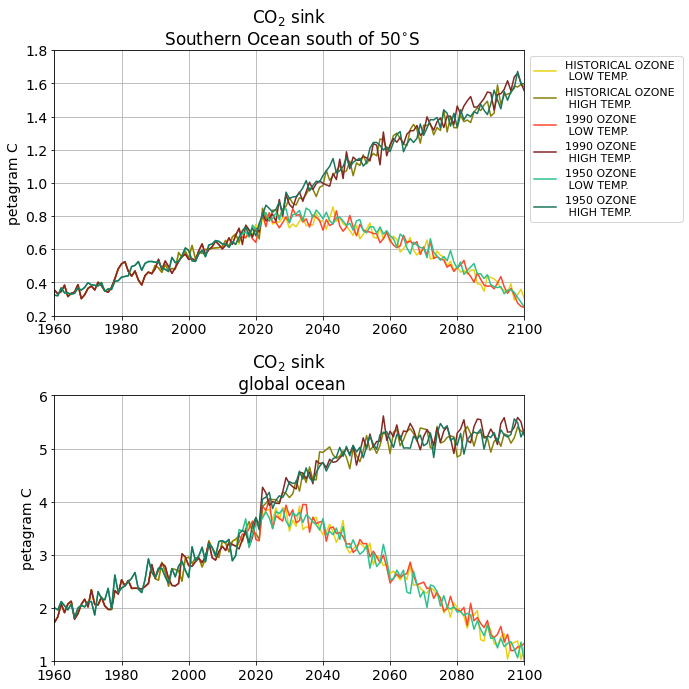

In [8]:
tms = ['TOM12_TJ_1ASA','TOM12_TJ_1BSA', 'TOM12_TJ_3ASA', 'TOM12_TJ_3BSA',\
          'TOM12_TJ_2ASA', 'TOM12_TJ_2BSA']

descs = ['HISTORICAL OZONE \n LOW TEMP.',\
         'HISTORICAL OZONE \n HIGH TEMP.',\
         '1990 OZONE \n LOW TEMP.',\
         '1990 OZONE \n HIGH TEMP.',\
         '1950 OZONE \n LOW TEMP.',\
         '1950 OZONE \n HIGH TEMP.',\
         'DW_WE43: DW(ERA5), DW_WE43 with GOC limit OFF',\
         'TJ_WE43: TJ(ERA5), rerun of DW_WE43 with GOC limit ON',\
         'DW_GA01: DW(NCEP), GCB run, no GOC brakes'] 

if graph:
    dsets = []

    for tm in tms:
        #print(tm)
        w = glob.glob(f'{sdir}*SUMMARY*{tm}*')
        #print(w)
        ds = xr.open_dataset(w[0])
        dsets.append(ds)
    plot_carbon_1(dsets, cols, descs, linestyles, sdir, fnam, tstart = 1948, tend = 2100, tendatm =1200)
    plot_carbon_2(dsets, cols, descs, linestyles, sdir, fnam, tstart = 1948, tend = 2100, tendatm =1200)


Text(0, 0.5, 'Dobson Units')

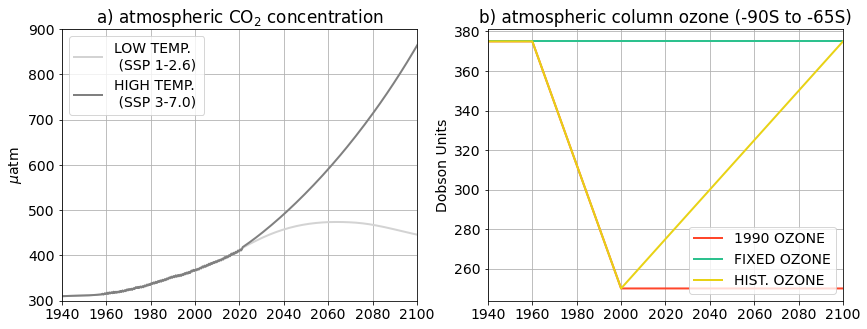

In [29]:
import numpy as np
import pandas as pd
q = pd.read_csv('./co2_simple.csv')
q.head()

yr = np.array(q.yr)
ssp1 = np.array(q.ssp1)
ssp3 = np.array(q.ssp3)

yrs = np.array([1940,1960,2000,2100])
du_fixed = np.zeros_like(yrs); du_fixed[:] = 375
du_hist = np.copy(du_fixed)
du_hist[2] = 250
du_1990 = np.copy(du_fixed)
du_1990[2:4] = 250

fact = 0.5
fig, axs = plt.subplots(1,2, figsize=(28*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].plot(yr,ssp1, color = 'lightgrey', linewidth = 2, label = 'LOW TEMP. \n (SSP 1-2.6)')
axs[0].plot(yr,ssp3, color = 'grey', linewidth = 2, label = 'HIGH TEMP. \n (SSP 3-7.0)')

axs[1].plot(yrs,du_1990, color = sc.scen['3A']['color'], linewidth = 2, label = '1990 OZONE')
axs[1].plot(yrs,du_fixed, color = sc.scen['2A']['color'], linewidth = 2, label = 'FIXED OZONE')
axs[1].plot(yrs,du_hist, color = sc.scen['1A']['color'], linewidth = 2, label = 'HIST. OZONE')

axs[0].set_ylim([300, 900])

for i in range(0,2):
    axs[i].set_xlim([1940,2100])
    axs[i].grid()
    axs[i].legend(loc = 'best')
axs[0].set_title('a) atmospheric CO$_2$ concentration')
axs[1].set_title('b) atmospheric column ozone (-90S to -65S)')
axs[0].set_ylabel('$\mu$atm')
axs[1].set_ylabel('Dobson Units')

In [10]:
# extract = False #extracting?
# graph = True #plotting?
# sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/' #results directory
# fnam = 'Cflx_spinup_monitor.png' ## filename for resulting plot
# tms = ['TOM12_TJ_SP01']#,'TOM12_TJ_1BS2', 'TOM12_TJ_3AS1','TOM12_DW_WE43', 'TOM12_DW_GA01'] ##models to plot
# tms_te = tms ##models to extract
# descs = ['SPO1: model spinup',
#          'GA01: DW(NCEP), GCB run'] #descriptions of models in tm
# cols = ['brown', sc.scen['1A']['color'],sc.scen['1B']['color'],sc.scen['3A']['color'], 'grey', 'b'] #colours for models in tm

# if extract: 
#     for tm in tms_te:
#         bp.breakdown_maker(tm, bdflag = 'cflx', resDir = sdir)
# linestyles = ['-',':','-',':','-',':','-',':','-']
# ## open the datasets
# if graph:
#     dsets = []

#     for tm in tms:
#         w = glob.glob(f'{sdir}*{tm}*')
#         ds = xr.open_dataset(w[0])
#         dsets.append(ds)
#     pr.plot_carbon(dsets, cols, descs,linestyles, sdir, fnam, tstart = 1700, tend = 2100, tendatm = 450)
